In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


([], [])

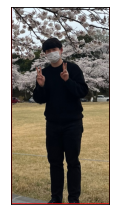

In [7]:
filename = "image3.jpg"
# 예측할 그림 가져오기, gray convert
image1 = cv2.imread(filename)     
grayImage1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# cascade xml 파일 선택
body_cascade = cv2.CascadeClassifier('C:/Users/yhj25/Desktop/color_clu/haarcascade_fullbody.xml')
# 10 = 검출한 사각형 사이 최소 간격, body에 x,y,w,h가 여러개 저장됨.
body = body_cascade.detectMultiScale(image1, 1.01, 10, 0, minSize=(100, 100))

for (x,y,w,h) in body :         
   cv2.rectangle(image1,(x,y),(x+w,y+h),(0,0,255),3)



img = image1
dst = img[y:y+h, x:x+w].copy()
plt.subplot(1, 3, 1)
plt.imshow(dst[:,:,::-1])
plt.xticks([])
plt.yticks([])

In [3]:
def centroid_histogram(clt):

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):

    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
       
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

In [4]:
def image_color_cluster(image_path, k = 5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.xticks([])
    plt.yticks([])
    plt.show()

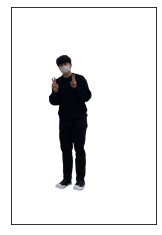

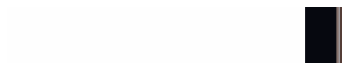

In [5]:
image_path = "C:/Users/yhj25/Desktop/color_clu/img2.png"

#preview image
image = mpimg.imread(image_path)
plt.xticks([])
plt.yticks([])
plt.imshow(image)

image_color_cluster(image_path)